# Project Description:

A project from Object Recognition domain.

# Context:

The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

# Data Description:

The columns of the dataset can be divided into two parts - **Independent Attributes** and **Dependent Attributes**:

- **Independent Attributes**: There are 18 independent attributes namely

compactness

circularity

distance_circularity

radius_ratio

pr.axis_aspect_ratio

max.length_aspect_ratio

scatter_ratio

elongatedness

pr.axis_rectangularity

max.length_rectangularity

scaled_variance

scaled_variance.1

scaled_radius_of_gyration

scaled_radius_of_gyration.1

skewness_about

skewness_about.1

skewness_about.2

hollows_ratio

All the above mentioned attributes are numerical.

- **Dependent Attributes**: There is only one dependent attribute 

**class**: Although 4 'Corgie' models were used for the experiment - a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. The expectation was to distinguish between bus, van and either of the cars easily but as it turned out that it became very difficult to distinguish between the cars. So, as it stand out there are 3 major class of vehicle in the dataset - Bus, Van and Car. 


# Objective:

Apply dimensionality reduction technique - PCA and train a model using principle components instead of training the model using just the raw data, to classify a given silhouette as one of the three types of vehicle, using a set of features extracted from one of many different angles.

### Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

### 1. Load the dataset

In [3]:
vehicle_data = pd.read_csv('vehicle-1.csv')

### 2. Pre-processing of dataset.

#### First five entries of the dataset

In [4]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

#### Shape of the data

In [5]:
vehicle_data.shape

(846, 19)

The two-dimensional dataframe i.e., vehicle_data consists of 846 rows and 19 columns.

#### Dataframe of each attribute

In [6]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

All the attributes apart from **class** contains numerical values. As, **class** is not an object, it is a category so:

In [7]:
vehicle_data['class'] = vehicle_data['class'].astype('category')

In [8]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  841 non-null    float64 
 2   distance_circularity         842 non-null    float64 
 3   radius_ratio                 840 non-null    float64 
 4   pr.axis_aspect_ratio         844 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                845 non-null    float64 
 7   elongatedness                845 non-null    float64 
 8   pr.axis_rectangularity       843 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              843 non-null    float64 
 11  scaled_variance.1            844 non-null    float64 
 12  scaled_radius_of_gyration    844 non-null    float64 
 13  scale

#### 5 point summary of the numerical attributes

In [9]:
vehicle_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

The numerical attributes can be summarised in the following manner:

**compactness**: There are 846 records in the attribute with a mean value of 93.678487. The value ranges from 73 to 119. The 25% off the records have values below 87, 50% below 93 and 75% below 100. The observations differ from mean by 8.234474

**circularity**: There are 841 records in the column with a mean value of 44.828775. The value ranges from 33 to 59. 25% of the records have values below 40, 50% below 44 and 75% below 49. The observations differ from the mean by 6.152172

**distance_circularity**: There are 842 records in the column with a mean value of 82.110451. The value ranges from 40 to 112. 25% of the records have values below 70, 50% below 80 and 75% below 98. The observations differ from the mean by 15.778292

**radius_ratio**: There are 840 records in the column with a mean value of 168.888095. The value ranges from 104 to 333. 25% of the records have values below 141, 50% below 167 and 75% below 195. The observations differ from the mean by 33.520198

**pr.axis_aspect_ratio**: There are 844 records in the column with a mean value of 61.67891. The value ranges from 47 to 138. 25% of the records have values below 57, 50% below 61 and 75% below 65. The observations differ from the mean by 7.891463

**max.length_aspect_ratio**: There are 846 records in the column with a mean value of 8.567376. The value ranges from 2 to 55. 25% of the records have values below 7, 50% below 8 and 75% below 10. The observations differ from the mean by 4.601217

**scatter_ratio**: There are 845 records in the column with a mean value of 168.901775. The value ranges from 112 to 265. 25% of the records have values below 147, 50% below 157 and 75% below 198. The observations differ from the mean by 33.214848

**elongatedness**: There are 845 records in the column with a mean value of 40.933728. The value ranges from 26 to 61. 25% of the records have values below 33, 50% below 43 and 75% below 46. The observations differ from the mean by 7.816186

**pr.axis_rectangularity**: There are 843 records in the column with a mean value of 20.582444. The value ranges from 17 to 29. 25% of the records have values below 19, 50% below 20 and 75% below 23. The observations differ from the mean by 2.592933

**max.length_rectangularity**: There are 846 records in the column with a mean value of 147.998818. The value ranges from 118 to 188. 25% of the records have values below 137, 50% below 146 and 75% below 159. The observations differ from the mean by 14.515652

**scaled_variance**: There are 843 records in the column with a mean value of 188.631079. The value ranges from 130 to 320. 25% of the records have values below 167, 50% below 179 and 75% below 217. The observations differ from the mean by 31.411004

**scaled_variance.1**: There are 844 records in the column with a mean value of 439.494076. The value ranges from 184 to 1018. 25% of the records have values below 318, 50% below 363.5 and 75% below 587. The observations differ from the mean by 176.666903

**scaled_radius_of_gyration**: There are 844 records in the column with a mean value of 174.709716. The value ranges from 109 to 268. 25% of the records have values below 149, 50% below 173.5 and 75% below 198. The observations differ from the mean by 32.584808

**scaled_radius_of_gyration.1**: There are 842 records in the column with a mean value of 72.447743. The value ranges from 59 to 135. 25% of the records have values below 67, 50% below 71.5 and 75% below 75. The observations differ from the mean by 7.48619

**skewness_about**: There are 840 records in the column with a mean value of 6.364286. The value ranges from 0 to 22. 25% of the records have values below 2, 50% below 6 and 75% below 9. The observations differ from the mean by 4.920649

**skewness_about.1**: There are 845 records in the column with a mean value of 12.602367. The value ranges from 0 to 41. 25% of the records have values below 5, 50% below 11 and 75% below 19. The observations differ from the mean by 8.936081

**skewness_about.2**: There are 845 records in the column with a mean value of 188.919527. The value ranges from 176 to 206. 25% of the records have values below 184, 50% below 188 and 75% below 193. The observations differ from the mean by 6.155809

**hollows_ratio**: There are 846 records in the column with a mean value of 195.632388. The value ranges from 181 to 211. 25% of the records have values below 190.25, 50% below 197 and 75% below 201. The observations differ from the mean by 7.438797


#### To check presence of missing values

In [10]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Here we can see that apart from the attributes **compactness**, **max.length_aspect_ratio**, **max_length_rectangularity**, **hollows_ratio** and **class** every other attributes have some amount of missing values in them.

#### Handling of Missing values

In [11]:
# List of all the rows having missing value in any of the single or multiple columns:
vehicle_data[vehicle_data.isnull().any(axis = 1)].head(33)

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [12]:
# replace missing values with null values using numpy(np.nan)
vehicle_data = vehicle_data.replace(' ', np.nan)

In [13]:
# Replacing the missing values by median
for i in vehicle_data.columns[:17]:
    median_value = vehicle_data[i].median()
    vehicle_data[i] = vehicle_data[i].fillna(median_value)

In [14]:
# again checking for missing values:
vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Thus, we have replaced the missing values with the median of the column.

#### 5 point summary of numerical attributes (after filling up the missing values)

In [15]:
vehicle_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### 3. Understanding the attributes.

#### Univariate Analysis:

Text(0.5, 1.0, 'Box Plot')

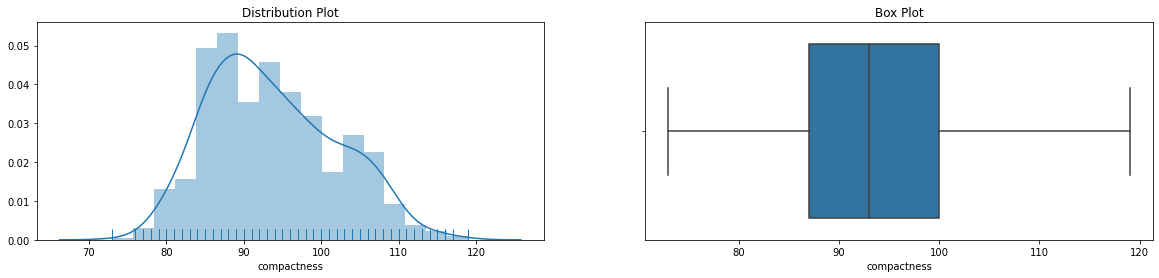

In [16]:
# plotting of 'compactness':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2 )
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['compactness'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['compactness'], ax = ax2)
ax2.set_title('Box Plot')

From the above plots it is clear that there are no outliers in **compactness** and its look like it is normally distributed. 

Text(0.5, 1.0, 'Box Plot')

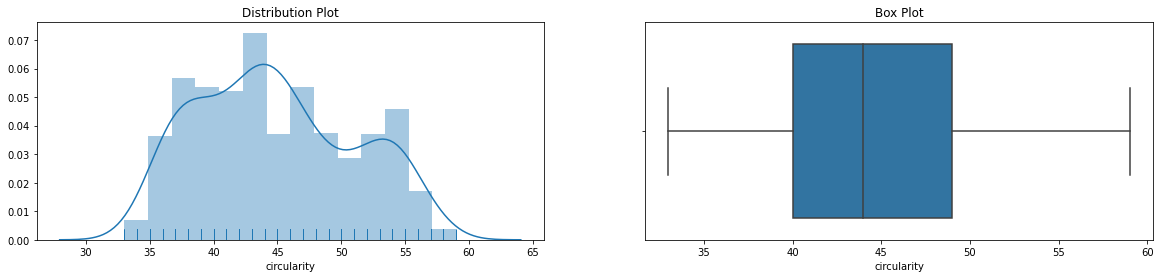

In [17]:
# plotting of 'circularity':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['circularity'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['circularity'], ax = ax2)
ax2.set_title('Box Plot')

From the above plots it is clear that there are no outliers in **circularity** and its look like it is normally distributed. 

Text(0.5, 1.0, 'Box Plot')

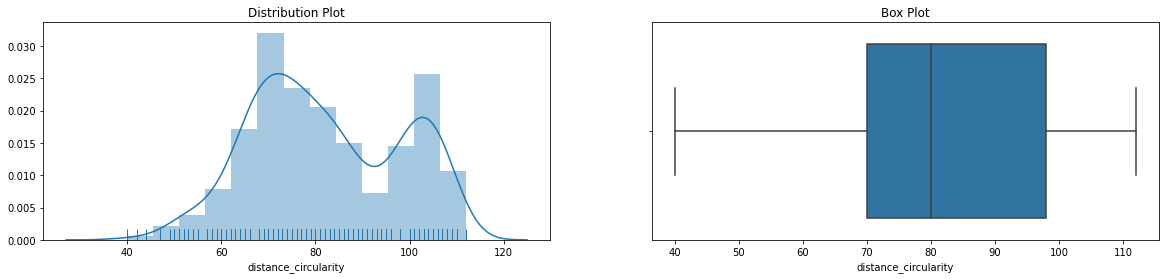

In [18]:
# plotting of 'distance_circularity':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['distance_circularity'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['distance_circularity'], ax = ax2)
ax2.set_title('Box Plot')

From the above plot it is clear that the attribute **distance_circularity** doesn't have any outliers in them. But in distribution plot we can see that there are two peaks along with a right skewness as the long tail is on the right side (mean > median). 

Text(0.5, 1.0, 'Box Plot')

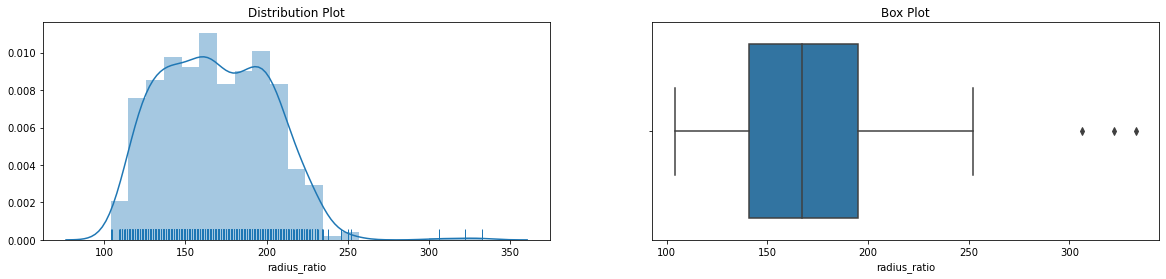

In [19]:
# plotting of 'radius_ratio':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['radius_ratio'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['radius_ratio'], ax = ax2)
ax2.set_title('Box Plot')

From the plot it is clear that the attribute **radius_ratio** does have outliers. Also, there is right skewness as the long tail is in the right side. The number of outliers can be calculated as:

In [20]:
rr_25 = np.percentile(vehicle_data['radius_ratio'], 25)
rr_75 = np.percentile(vehicle_data['radius_ratio'], 75)
iqr_rr = rr_75 - rr_25
cutoff_rr = 1.5 * iqr_rr
low_lim_rr = rr_25 - cutoff_rr
upp_lim_rr = rr_75 + cutoff_rr

outlier_rr = [x for x in vehicle_data['radius_ratio'] if x < low_lim_rr or x > upp_lim_rr]
print("The number of outliers in 'radius_ratio' out off 846 records are:", len(outlier_rr))

The number of outliers in 'radius_ratio' out off 846 records are: 3


Text(0.5, 1.0, 'Box Plot')

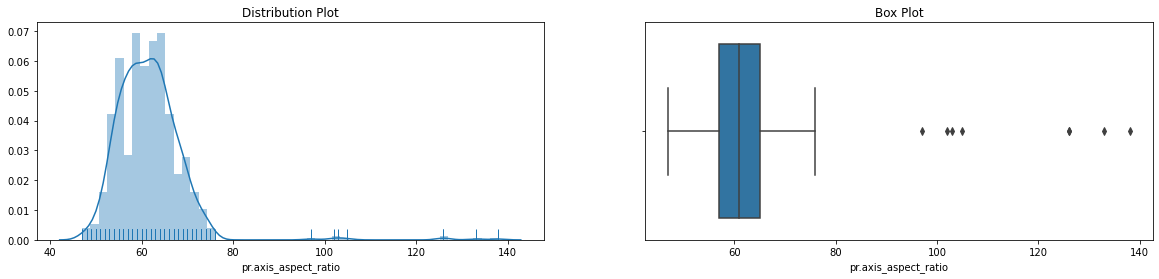

In [21]:
# plotting of 'pr.axis_aspect_ratio':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['pr.axis_aspect_ratio'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['pr.axis_aspect_ratio'], ax = ax2)
ax2.set_title('Box Plot')

From, the above box plot it is clear that the attribute **pr.axis_aspect_ratio** does have outliers in them. Apart from this, from distribution plot it is clear that the attribute is right skewed. The number of outliers can be calculated as:

In [22]:
ar_25 = np.percentile(vehicle_data['pr.axis_aspect_ratio'], 25)
ar_75 = np.percentile(vehicle_data['pr.axis_aspect_ratio'], 75)
iqr_ar = ar_75 - ar_25
cutoff_ar = 1.5 * iqr_ar
low_lim_ar = ar_25 - cutoff_ar
upp_lim_ar = ar_75 + cutoff_ar

outlier_ar = [x for x in vehicle_data['pr.axis_aspect_ratio'] if x < low_lim_ar or x > upp_lim_ar]
print("The number of outliers in 'pr.axis_aspect_ratio' out off 846 records are:", len(outlier_ar))

The number of outliers in 'pr.axis_aspect_ratio' out off 846 records are: 8


Text(0.5, 1.0, 'Box Plot')

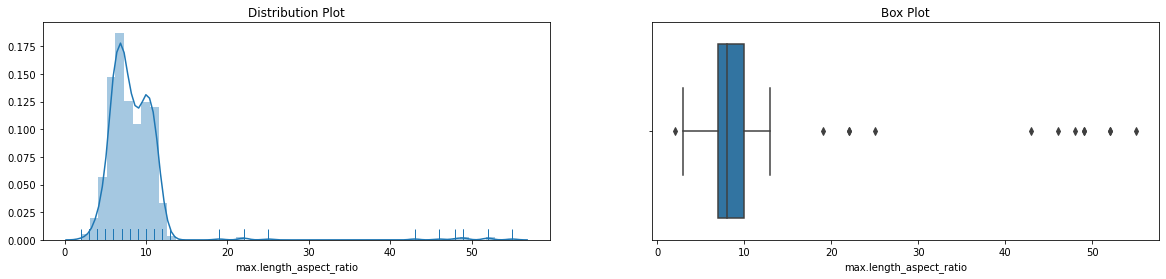

In [23]:
# plotting of 'max.length_aspect_ratio':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['max.length_aspect_ratio'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['max.length_aspect_ratio'], ax = ax2)
ax2.set_title('Box Plot')

From the above plots it is clear that **max.length_aspect_ratio** is skewed positively and does have outliers in it. The number of outliers can be calculated as:

In [24]:
lar_25 = np.percentile(vehicle_data['max.length_aspect_ratio'], 25)
lar_75 = np.percentile(vehicle_data['max.length_aspect_ratio'], 75)
iqr_lar = lar_75 - lar_25
cutoff_lar = 1.5 * iqr_lar
low_lim_lar = lar_25 - cutoff_lar
upp_lim_lar = lar_75 + cutoff_lar

outlier_lar = [x for x in vehicle_data['max.length_aspect_ratio'] if x < low_lim_lar or x > upp_lim_lar]
print("The number of outliers in 'max.length_aspect_ratio' out off 846 records are:", len(outlier_lar))

The number of outliers in 'max.length_aspect_ratio' out off 846 records are: 13


Text(0.5, 1.0, 'Box Plot')

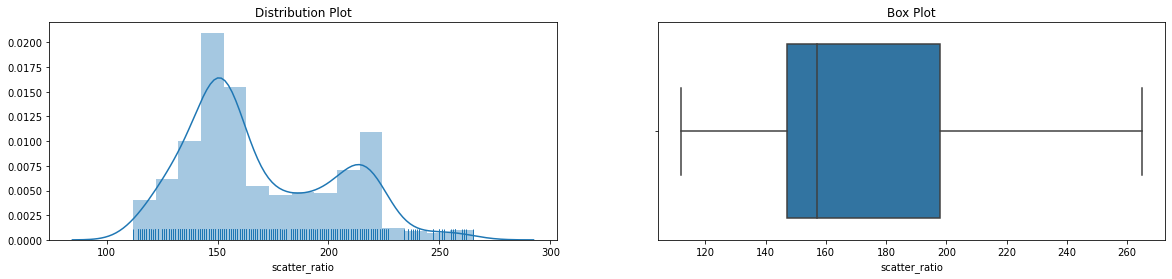

In [25]:
# plotting of 'scatter_ratio':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['scatter_ratio'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['scatter_ratio'], ax = ax2)
ax2.set_title('Box Plot')

From the above plots it is clear that there are no outliers in **scatter_ratio**. Also, from the distribution plot it is evident that there is right skewness as its long tail is in the right side.

Text(0.5, 1.0, 'Box Plot')

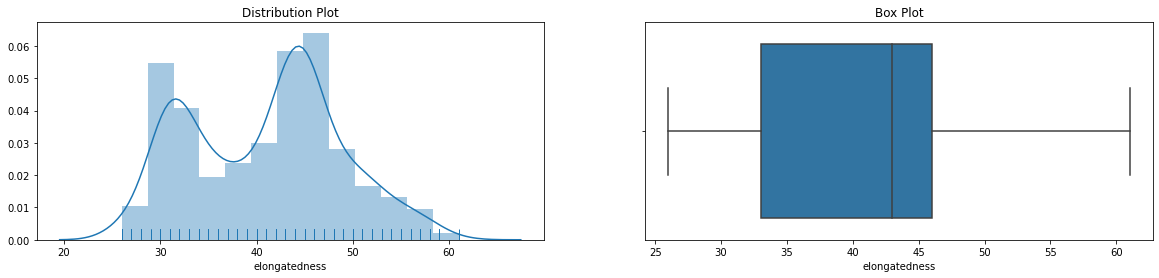

In [26]:
# plotting of 'elongatedness':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['elongatedness'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['elongatedness'], ax = ax2)
ax2.set_title('Box Plot')

From the above box plot it is clear that **elongatedness** doesn't have any outliers in them. There are two peaks in the distribution plot with a left skewdness as its long tail is in the left side. 

Text(0.5, 1.0, 'Box Plot')

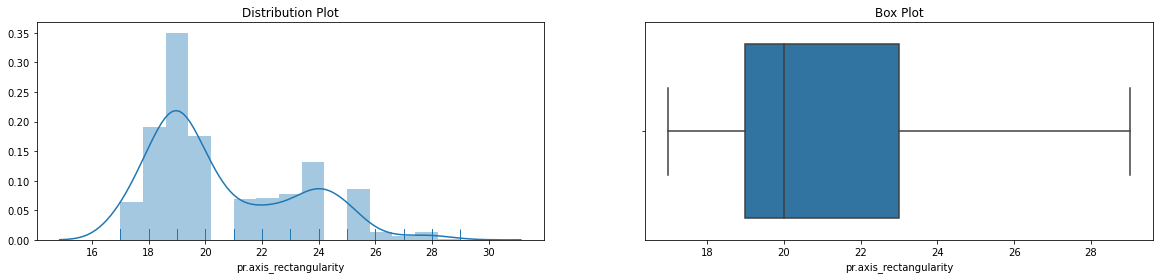

In [27]:
# plotting of 'pr.axis_rectangularity':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['pr.axis_rectangularity'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['pr.axis_rectangularity'], ax = ax2)
ax2.set_title('Box Plot')

From the above box plot it is clear that **pr.axis_rectangularity** doesn't have any outliers in them. Also, from the distribution plot it is evident that there is right skewdness.

Text(0.5, 1.0, 'Box Plot')

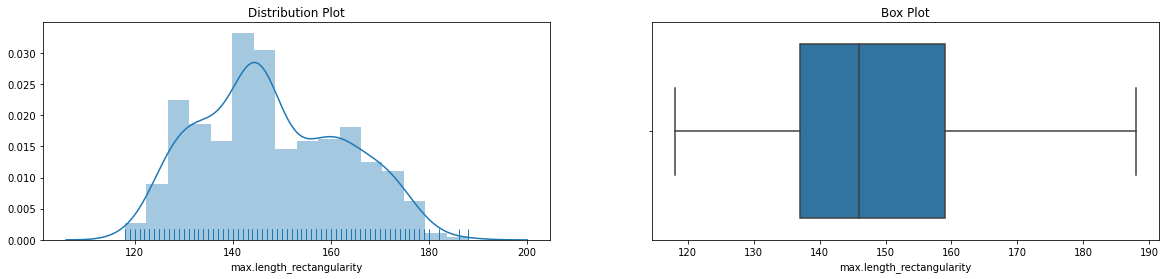

In [28]:
# plotting of 'max.length_rectangularity':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['max.length_rectangularity'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['max.length_rectangularity'], ax = ax2)
ax2.set_title('Box Plot')

From the above box plot it is clear that **max.length_rectangularity** doesn't have any outliers in them. Also, there is slight right skewdness in the attribute as it is evident from the plots.

Text(0.5, 1.0, 'Box Plot')

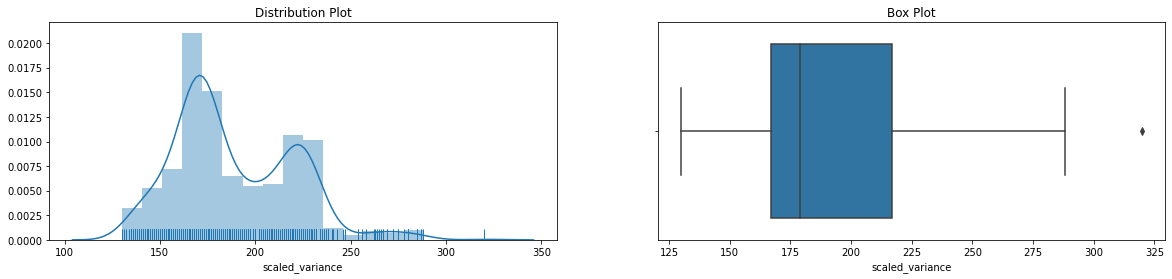

In [29]:
# plotting of 'scaled_variance':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['scaled_variance'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['scaled_variance'], ax = ax2)
ax2.set_title('Box Plot')

From the above box plot it is clear that **scaled_variance** does have outliers in it. Also, the distribution plot indicates that there is a fair amount of right skewdness. The number of outliers can be calculated as:

In [30]:
sv_25 = np.percentile(vehicle_data['scaled_variance'], 25)
sv_75 = np.percentile(vehicle_data['scaled_variance'], 75)
iqr_sv = sv_75 - sv_25
cutoff_sv = 1.5 * iqr_sv
low_lim_sv = sv_25 - cutoff_sv
upp_lim_sv = sv_75 + cutoff_sv

outlier_sv = [x for x in vehicle_data['scaled_variance'] if x < low_lim_sv or x > upp_lim_sv]
print("The number of outliers in 'scaled_variance' out off 846 records are:", len(outlier_sv))

The number of outliers in 'scaled_variance' out off 846 records are: 1


Text(0.5, 1.0, 'Box Plot')

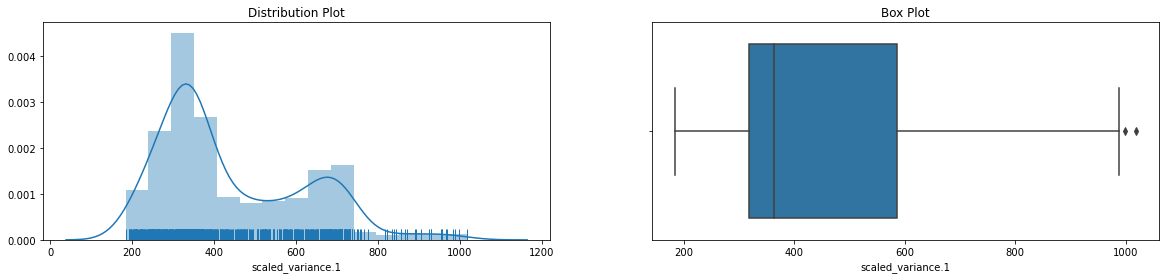

In [31]:
# plotting of 'scaled_variance.1':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['scaled_variance.1'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['scaled_variance.1'], ax = ax2)
ax2.set_title('Box Plot')

From the above box plot it clear that the attribute **scaled_variance.1** does have an outlier in them. Also, from the above distribution plot it is clear that it has two peaks and a long tail in the right side, thereby indicating a positive skewdness in there. The number of outlier can be calculated as:

In [32]:
sc1_25 = np.percentile(vehicle_data['scaled_variance.1'], 25)
sc1_75 = np.percentile(vehicle_data['scaled_variance.1'], 75)
iqr_sc1 = sc1_75 - sc1_25
cutoff_sc1 = 1.5 * iqr_sc1
low_lim_sc1 = sc1_25 - cutoff_sc1
upp_lim_sc1 = sc1_75 + cutoff_sc1

outlier_sc1 = [x for x in vehicle_data['scaled_variance.1'] if x < low_lim_sc1 or x > upp_lim_sc1]
print("The number of outliers in 'scaled_variance.1' out off 846 records is:" , len(outlier_sc1))

The number of outliers in 'scaled_variance.1' out off 846 records is: 2


Text(0.5, 1.0, 'Box Plot')

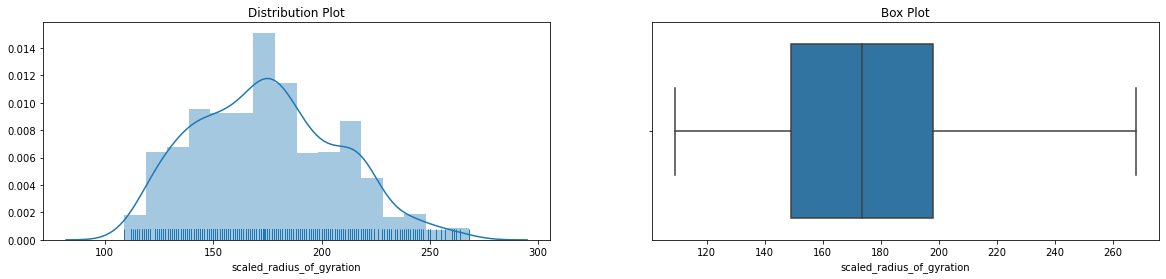

In [33]:
# plotting of 'scaled_radius_of_gyration':
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['scaled_radius_of_gyration'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['scaled_radius_of_gyration'], ax = ax2)
ax2.set_title('Box Plot')

From the above plot it is clear that there is no outliers in **scaled_radius_of_gyration** and there is a slight right skewdness as the long tail is in the right side.

Text(0.5, 1.0, 'Box Plot')

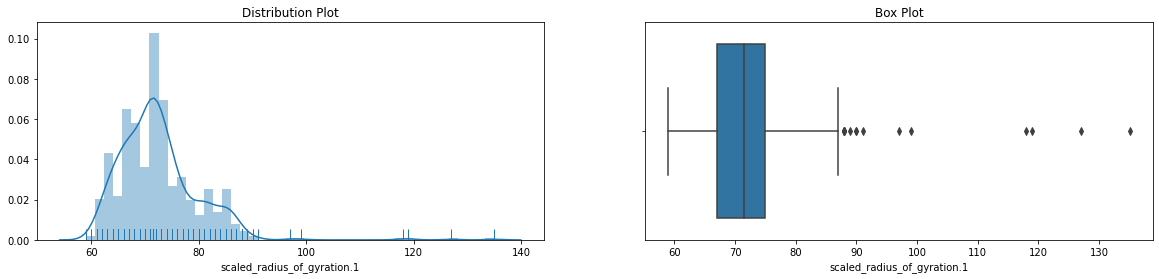

In [34]:
# plotting of 'scaled_radius_of_gyration.1':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['scaled_radius_of_gyration.1'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['scaled_radius_of_gyration.1'], ax = ax2)
ax2.set_title('Box Plot')

From the above plot it is clear that there are fair numbers of outliers in **scaled_radius_of_gyration.1** and there is a right skewdness as the long tail is in the right side. The number of outliers can be calculated as:

In [35]:
srg1_25 = np.percentile(vehicle_data['scaled_radius_of_gyration.1'], 25)
srg1_75 = np.percentile(vehicle_data['scaled_radius_of_gyration.1'], 75)
iqr_srg1 = srg1_75 - srg1_25
cutoff_srg1 = 1.5 * iqr_srg1
low_lim_srg1 = srg1_25 - cutoff_srg1
upp_lim_srg1 = srg1_75 + cutoff_srg1

outlier_srg1 = [x for x in vehicle_data['scaled_radius_of_gyration.1'] if x < low_lim_srg1 or x > upp_lim_srg1]
print("The number of outliers in 'scaled_radius_of_gyration.1' out off 846 records is:", len(outlier_srg1))

The number of outliers in 'scaled_radius_of_gyration.1' out off 846 records is: 15


Text(0.5, 1.0, 'Box Plot')

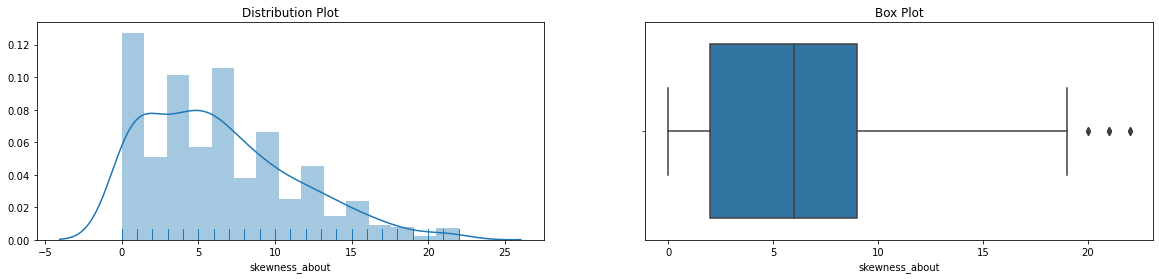

In [36]:
# plotting of 'skewness_about':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['skewness_about'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['skewness_about'], ax = ax2)
ax2.set_title('Box Plot')

From the above plot it is clear that **skewness_about** does have outliers in them. Also, there is right skewdness because of the long tail. The number of outliers can be calculated as:

In [37]:
sa_25 = np.percentile(vehicle_data['skewness_about'], 25)
sa_75 = np.percentile(vehicle_data['skewness_about'], 75)
iqr_75 = sa_75 - sa_25
cutoff_sa = 1.5 * iqr_75
low_lim_sa = sa_25 - cutoff_sa
upp_lim_sa = sa_75 + cutoff_sa

outlier_sa = [x for x in vehicle_data['skewness_about'] if x < low_lim_sa or x > upp_lim_sa]
print("The number of outliers in 'skewness_about' out off 846 records is:", len(outlier_sa))

The number of outliers in 'skewness_about' out off 846 records is: 12


Text(0.5, 1.0, 'Box Plot')

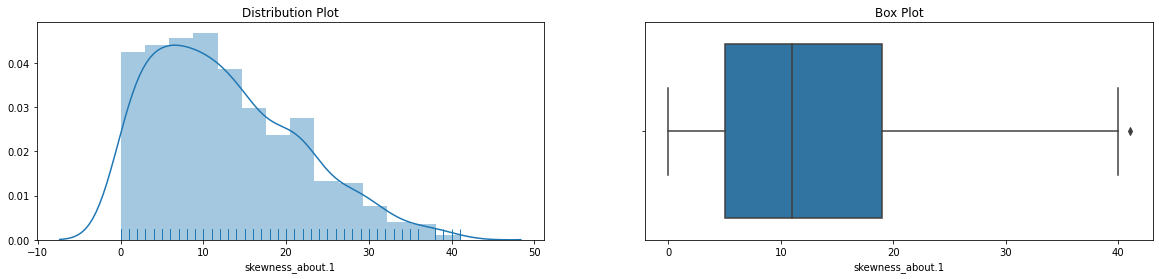

In [38]:
# plotting of 'skewness_about.1':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['skewness_about.1'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['skewness_about.1'], ax = ax2)
ax2.set_title('Box Plot')

From the above plot it is evident that **skewness_about.1** does have outliers in them and there is right skewdness in it. The number of outliers can be calculated as:

In [39]:
sa1_25 = np.percentile(vehicle_data['skewness_about.1'], 25)
sa1_75 = np.percentile(vehicle_data['skewness_about.1'], 75)
iqr_sa1 = sa1_75 - sa1_25
cutoff_sa1 = 1.5 * iqr_sa1
low_lim_sa1 = sa1_25 - cutoff_sa1
upp_lim_sa1 = sa1_75 + cutoff_sa1

outlier_sa1 = [x for x in vehicle_data['skewness_about.1'] if x < low_lim_sa1 or x > upp_lim_sa1]
print("The number of outliers in 'skewness_about.1' out off 846 records are:", len(outlier_sa1))

The number of outliers in 'skewness_about.1' out off 846 records are: 1


Text(0.5, 1.0, 'Box Plot')

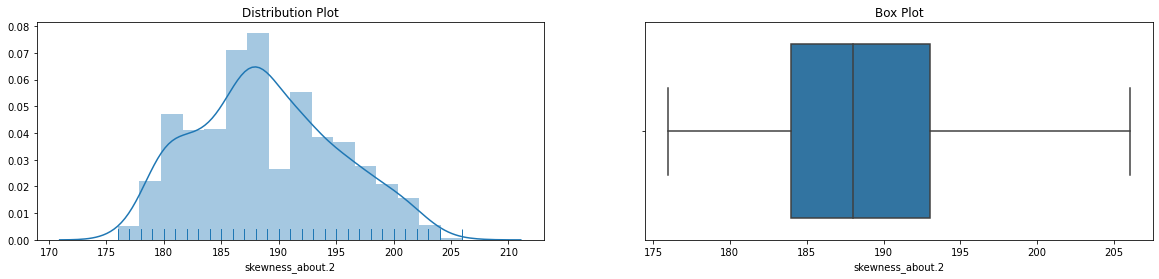

In [40]:
# plotting of 'skewness_about.2':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['skewness_about.2'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['skewness_about.2'], ax = ax2)
ax2.set_title('Box Plot')

From above we can see that there are no outliers in **skewness_about.2** alongwith a slight right skewdness.

Text(0.5, 1.0, 'Box Plot')

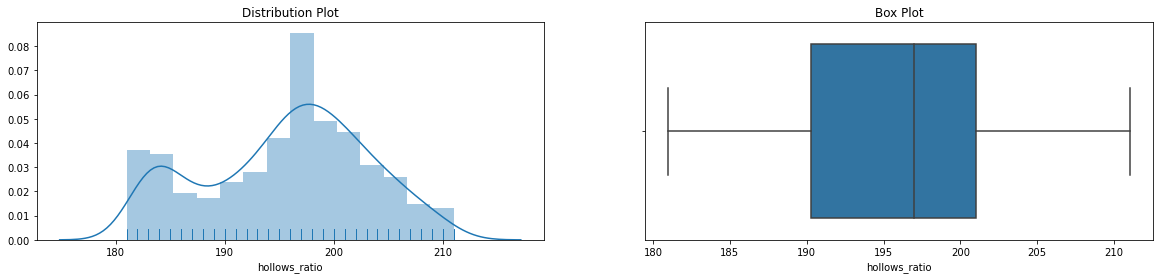

In [41]:
# plotting of 'hollows_ratio':
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20,4)
sns.distplot(vehicle_data['hollows_ratio'], rug = True, ax = ax1)
ax1.set_title('Distribution Plot')

sns.boxplot(vehicle_data['hollows_ratio'], ax = ax2)
ax2.set_title('Box Plot')

From the above plots it is clear that **hollows_ratio** doesn't have any outliers in them. Apart from this the values are slightly left skewed.

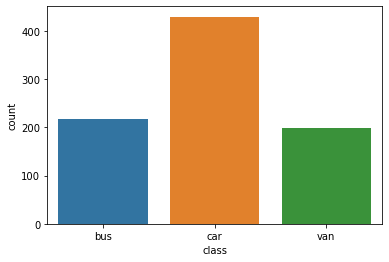

In [42]:
# plotting of 'class':
sns.countplot(vehicle_data['class'])

In [43]:
vehicle_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

There are 429 'cars' in the dataset along with 218 'bus' and 199 'van'.

#### Treating outliers in the dataset

In [44]:
for col_name in vehicle_data.columns[:-1]:
    iq_25 = vehicle_data[col_name].quantile(0.25)
    iq_75 = vehicle_data[col_name].quantile(0.75)
    iqr = iq_75 - iq_25
    cut_off = 1.5 * iqr
    low_lim = iq_25 - cut_off
    upp_lim = iq_75 + cut_off
    
    vehicle_data.loc[(vehicle_data[col_name] < low_lim) | (vehicle_data[col_name] > upp_lim), col_name] = vehicle_data[col_name].median()

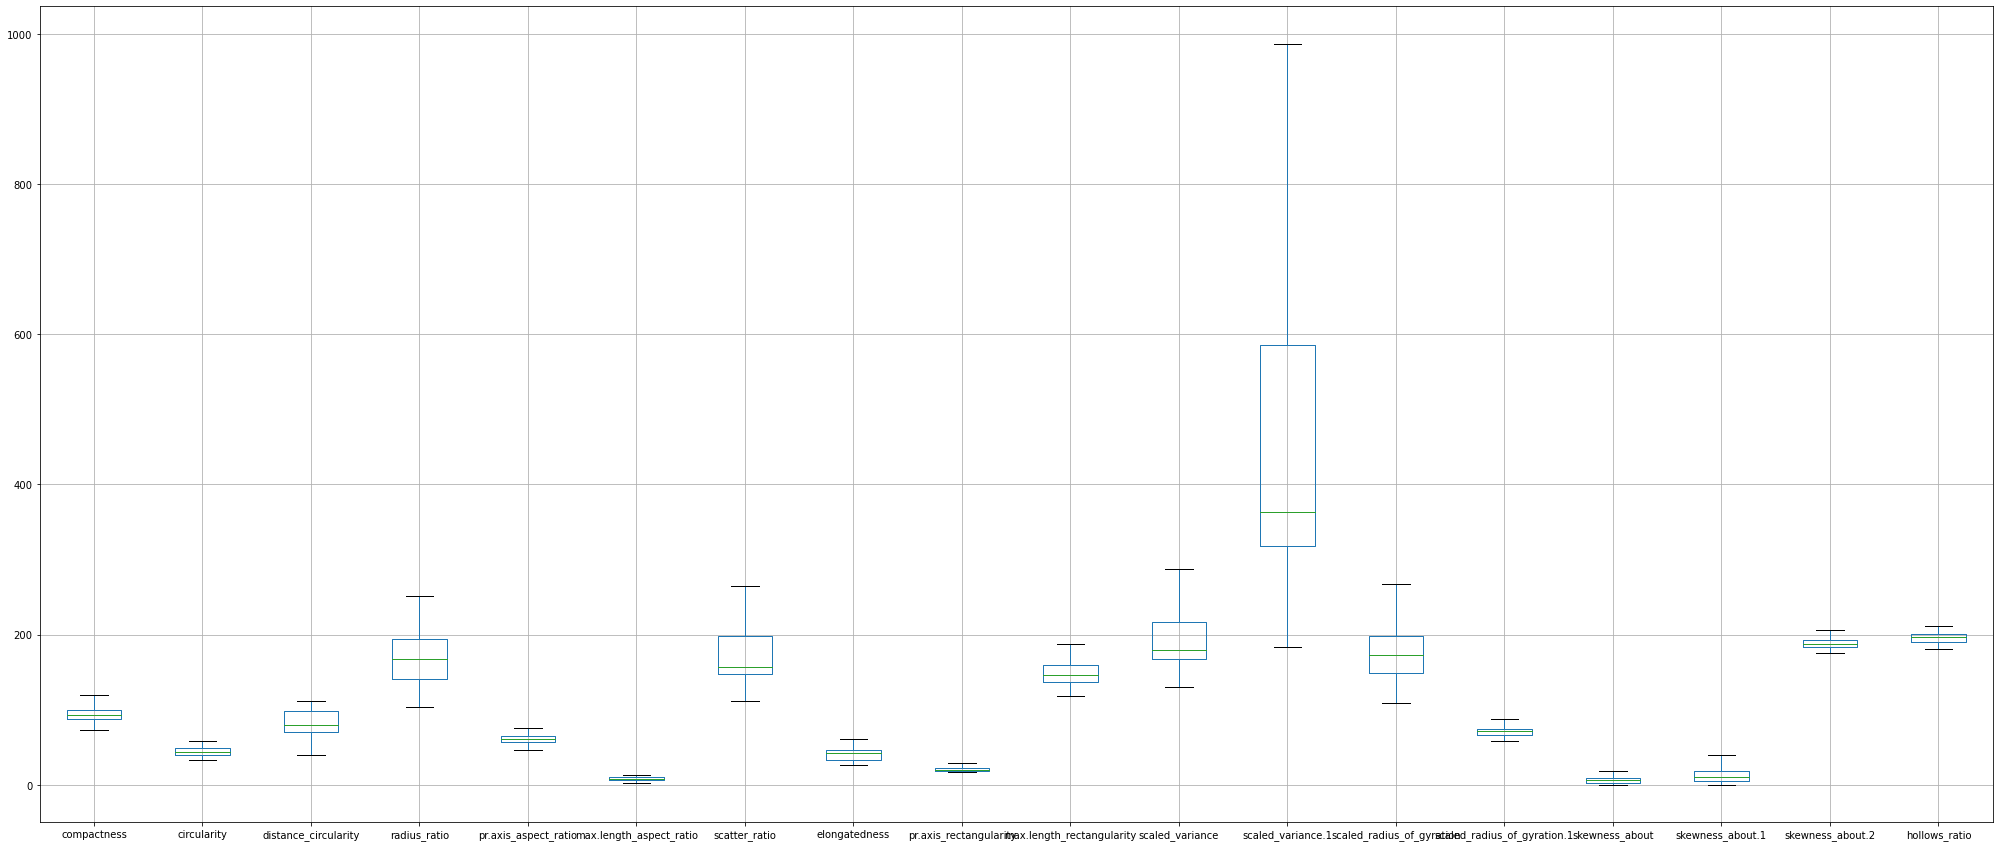

In [45]:
# again checking for outliers in dataset
vehicle_data.boxplot(figsize = (35,15))

#### Bivariate Analysis

Here we will be visualize as to how the different independent attributes vary with respect to the dependent attribute - **'status'**. 

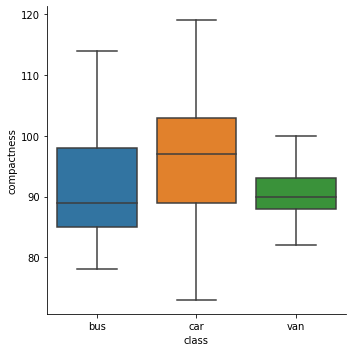

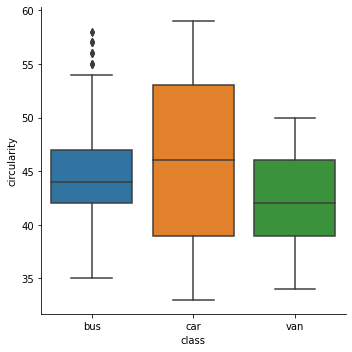

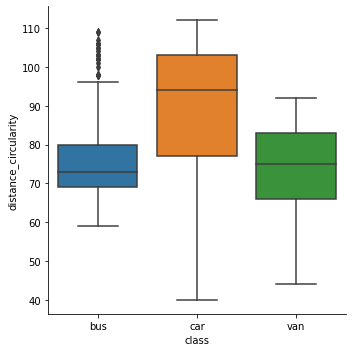

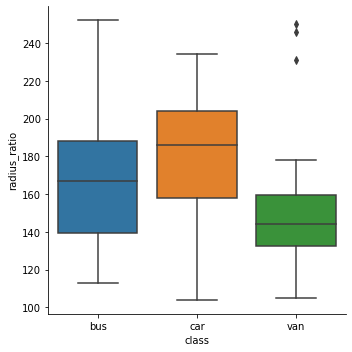

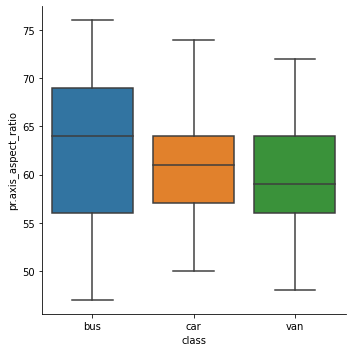

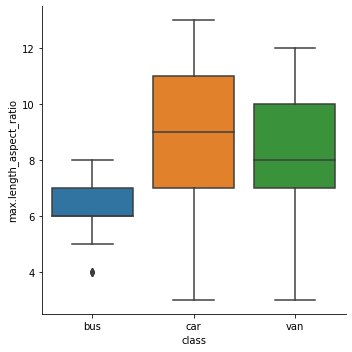

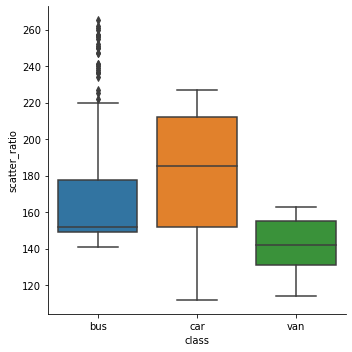

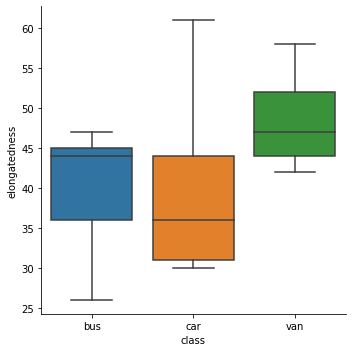

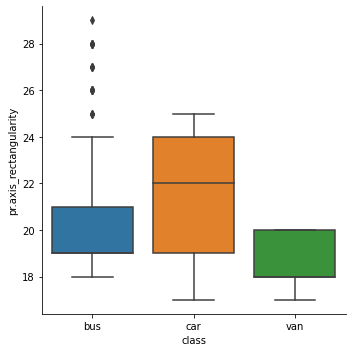

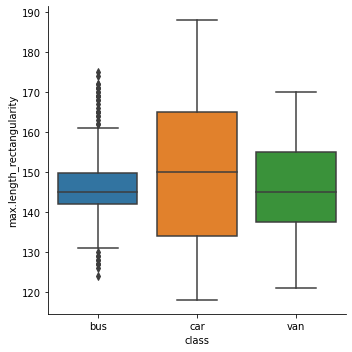

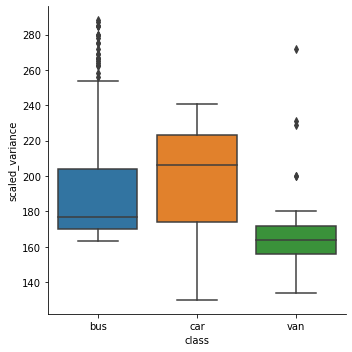

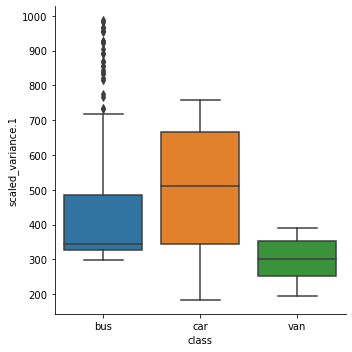

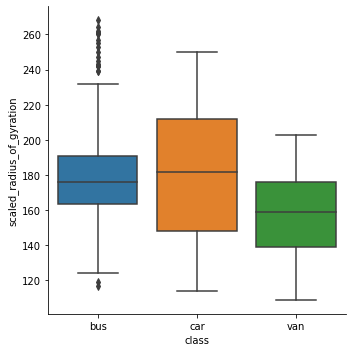

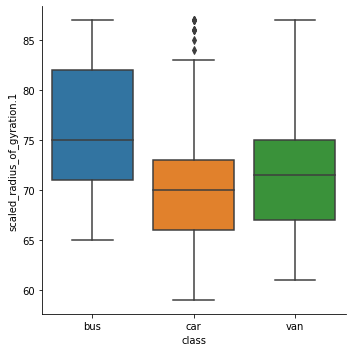

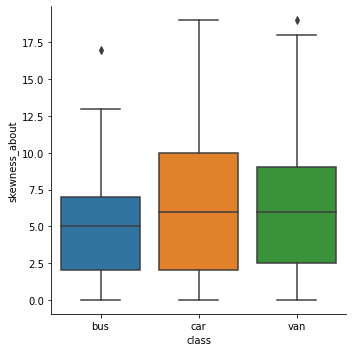

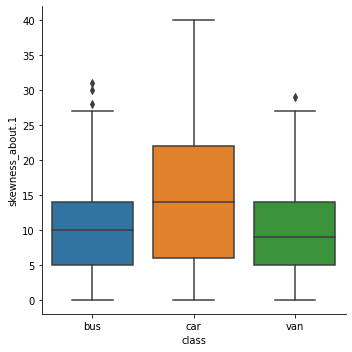

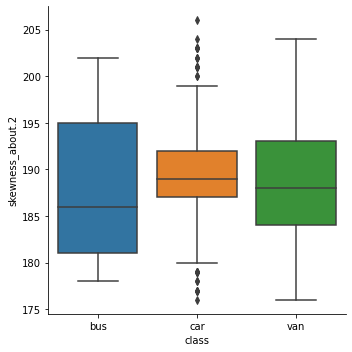

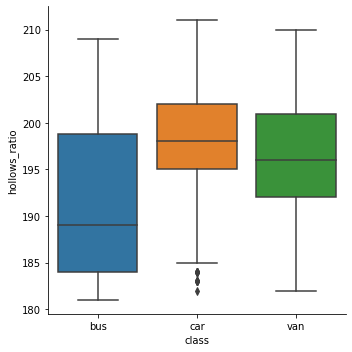

In [46]:
for i in vehicle_data:
    if i != 'class':
        sns.catplot(x = 'class', y = i, kind = 'box', data = vehicle_data)

- From the boxplot it is clear that **car** have higher values of **'compactness'**, **'circularity'**, **'distance_circularity'**, **'max.length_aspect_ratio'**, **'elongatedness'**, **'max.length_rectangularity'**, **'skewness_about'**, **'skewness_about.1'**, **'skewness_about.2'** and **hollows_ratio** as compared to **'bus'** and **'van'**.

- From the boxplot it is clear that **'bus'** have higher values of **'radius_ratio'**, **'pr.axis_aspect_ratio'**, **'scatter_ratio'**, **'pr.axis_rectangularity'**, **'scaled_variance'**, **'scaled_variance.1'**, **'scaled_radius_of_gyration'** as compared to **'car'** and **'van'**.

- From the boxplot it is clear that all the three vehicle types does have the same upper limit of **'scaled_radius_of_gyration.1'**.

#### Multivariate Analysis

This plot along with correlation matrix and heatmap will help us to analyze the relationship between the different attributes. 

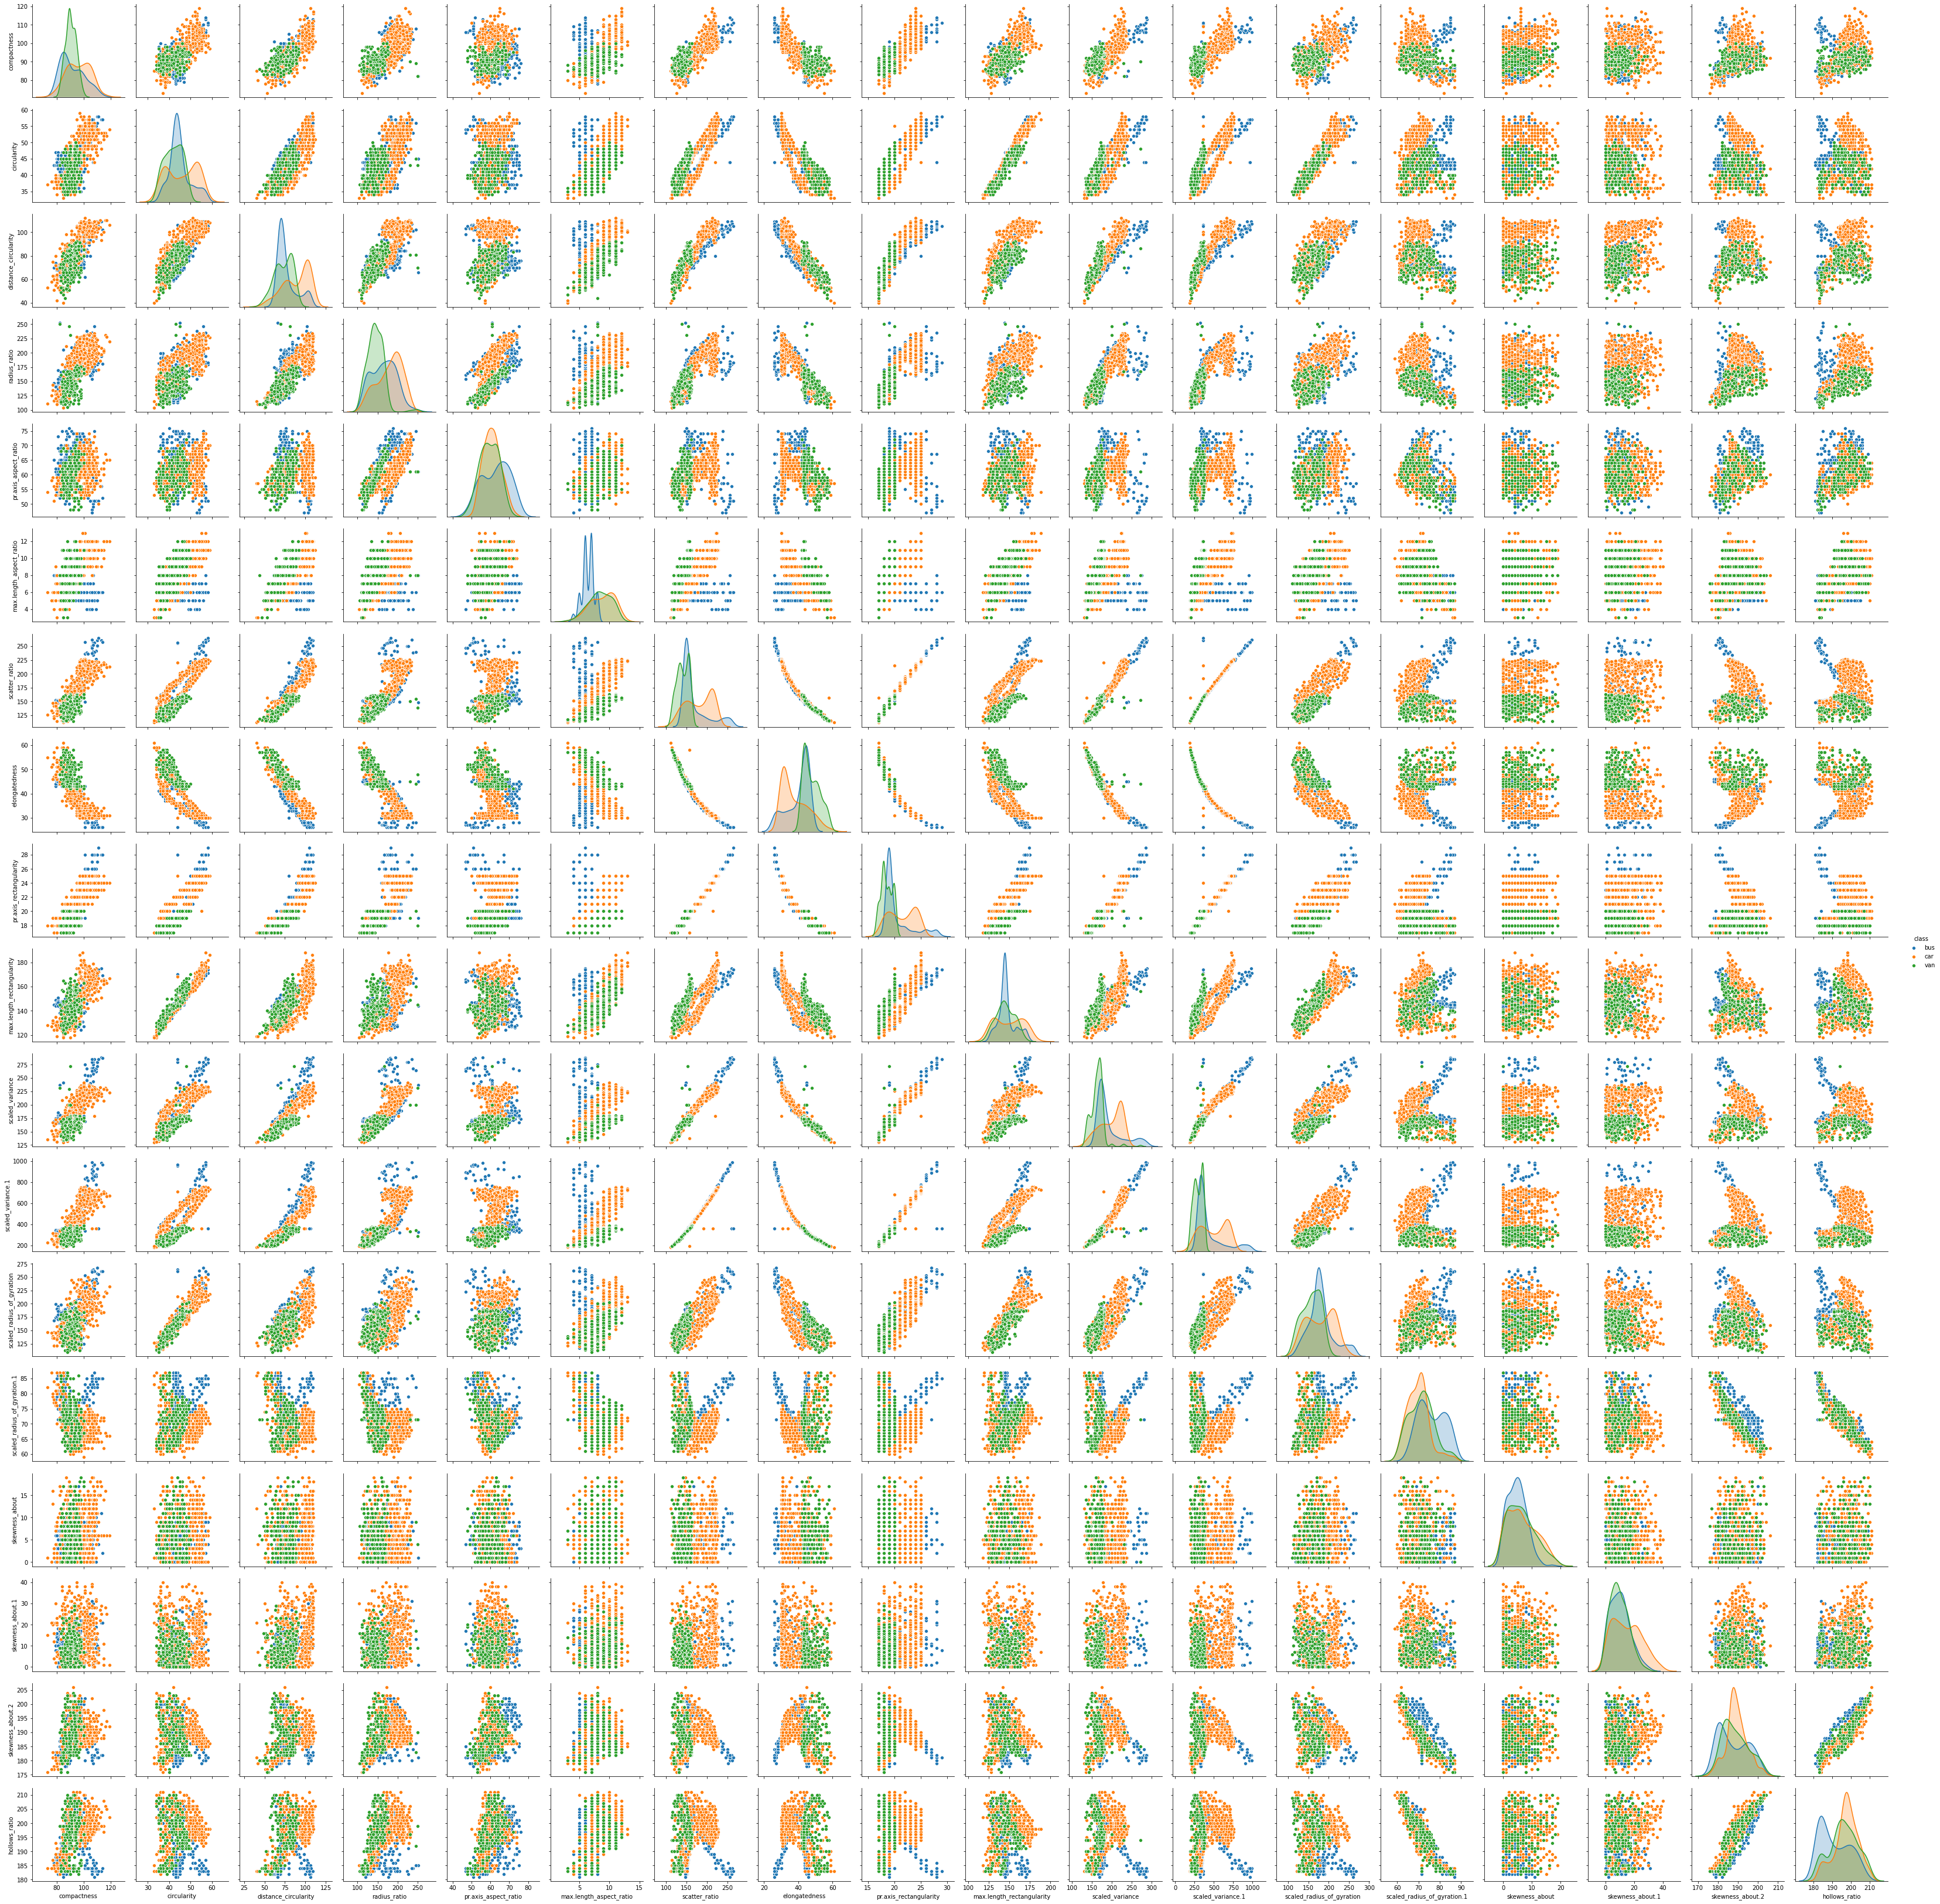

In [47]:
sns.pairplot(vehicle_data, hue = 'class')

In [48]:
# calculating the correlation coefficient
corr = vehicle_data.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                              0.081898       0.064242   
skewness_about.1                            0.141664       0.211647   
skewness_about.2                            0.

(18.5, -0.5)

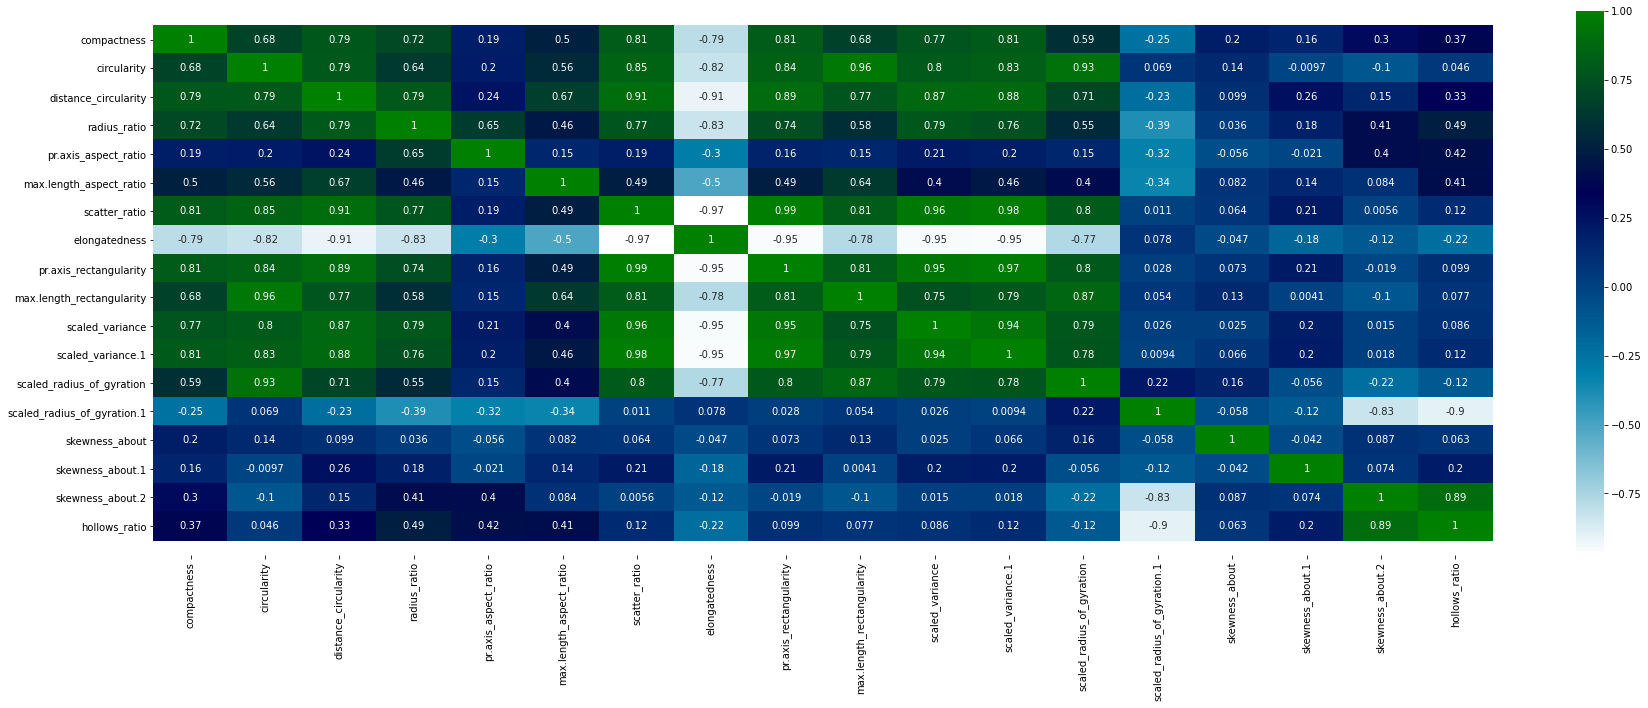

In [49]:
# plotting a heatmap
plt.figure(figsize = (30,10))
ax = sns.heatmap(corr, annot = True, cmap = "ocean_r")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- From the above it seems that **circularity** and **max.length_rectangularity**, **scatter_ratio** and **pr.axis_rectangularity**, **scatter_ratio** and **scaled_variance**, **scatter_ratio** and **scaled_variance.1**, **pr.axis_rectangularity** and **scaled_variance**, **pr.axis_rectangularity** and **scaled_variance.1** are strongly positively correlated.
- From the above it seems that **scatter_ratio** and **elongatedness**, **elongatedness** and **pr.axis_rectangularity**, **elongatedness** and **scaled_variance**, **elongatedness** and **scaled_variance.1** are strongly negatively correlated.
- From the above it is also evident that attributes like **pr.axis_aspect_ratio**, **scaled_radius_of_gyration.1**, **skewness_about**, **skewness_about.1** and **skewness_about.2** are loosely correlated to every other attributes.

### 3. Split the dataset into test and training dataset

In [50]:
X = vehicle_data.drop('class', axis = 1)
y = vehicle_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Here, the independent variables are denoted by **'X'** and the predictor is represented by **'y'**.

We will also standardize the dataset:

In [51]:
# standardization of the training and test data set
scaler = StandardScaler()
scaled_X_train = preprocessing.StandardScaler().fit_transform(X_train)
scaled_X_test = preprocessing.StandardScaler().fit_transform(X_test)

### 4. Support Vector Machine

In [52]:
svm_model = SVC(probability = True)
svm_model.fit(scaled_X_train, y_train)

SVC(probability=True)

In [53]:
pred_svm = svm_model.predict(scaled_X_test)
predictprob_svm = svm_model.predict_proba(scaled_X_test)

In [54]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_svm))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_svm))

Classification report for the model is given as: 
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        59
         car       0.96      0.97      0.96       133
         van       0.95      0.92      0.93        62

    accuracy                           0.96       254
   macro avg       0.96      0.95      0.95       254
weighted avg       0.96      0.96      0.96       254

Accuracy obtained from the given model is: 0.9566929133858267


Thus, the accuracy obtained from the model based on SVM is 95.67

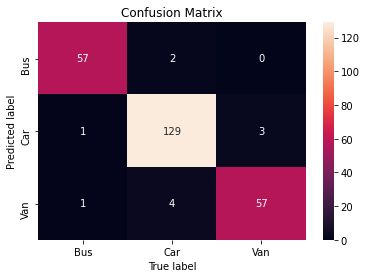

In [55]:
# Confusion Matrix:
cm_svm = confusion_matrix(y_test, pred_svm)

class_label = ['Bus', 'Car', 'Van']
df_cm_svm = pd.DataFrame(cm_svm, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_svm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

From the above Classification Matrix it is clear:
- The model has clearly predicted 57 vehicles as Bus which were actually Bus. However, it had also predicted 2 vehicles as Bus which were actually Car
- The model has clearly predicted 129 vehicles as Car which were actually Car. However, it had also predicted 1 vehicle as Car which was actually Bus. Also, it had predicted 3 vehicles as Car which were actually Van
- The model has clearly predicted 57 vehicles as Van which were actually Van. However, it had also predicted 1 vehicle as Van which was actually Bus. Also, it had predicted 4 vehicles as Van which were actually Car.

### 5. Applying GridSearchCV

The best classifier is:  SVC(C=10.0, class_weight='balanced', gamma=0.1)


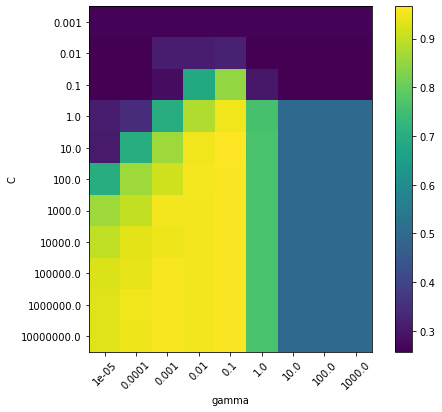

In [56]:
C_range = 10. ** np.arange(-3,8)
gamma_range = 10. **np.arange(-5,4)

param_grid = dict(gamma = gamma_range, C = C_range)

grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

grid.fit(scaled_X_train, y_train)
print("The best classifier is: ", grid.best_estimator_)

score_dict = grid.cv_results_

scores = score_dict.get('mean_test_score')
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

In [57]:
svm_model_cv = SVC(C = 10.0, gamma = 0.1, class_weight = 'balanced', probability = True, random_state = 1)
svm_model_cv.fit(scaled_X_train, y_train)

SVC(C=10.0, class_weight='balanced', gamma=0.1, probability=True,
    random_state=1)

In [58]:
pred_svm_cv = svm_model_cv.predict(scaled_X_test)
predictprob_svm_cv = svm_model_cv.predict_proba(scaled_X_test)

In [59]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_svm_cv))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_svm_cv))

Classification report for the model is given as: 
               precision    recall  f1-score   support

         bus       0.95      0.98      0.97        59
         car       0.97      0.95      0.96       133
         van       0.92      0.92      0.92        62

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254

Accuracy obtained from the given model is: 0.952755905511811


Thus, the accuracy obtained from the model is 95.28%.

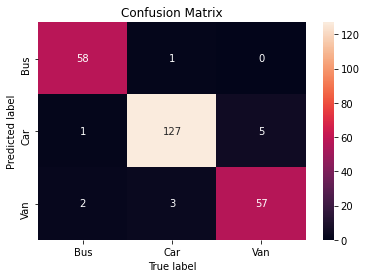

In [60]:
# Confusion Matrix:
cm_svm_cv = confusion_matrix(y_test, pred_svm_cv)

class_label = ['Bus', 'Car', 'Van']
df_cm_svm_cv = pd.DataFrame(cm_svm_cv, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_svm_cv, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

From the above Classification Matrix it is clear:
- The model has clearly predicted 58 vehicles as Bus which were actually Bus. However, it had also predicted 1 vehicle as Bus which was actually Car
- The model has clearly predicted 127 vehicles as Car which were actually Car. However, it had also predicted 1 vehicle as Car which was actually Bus. Also, it had predicted 5 vehicles as Car which were actually Van
- The model has clearly predicted 57 vehicles as Van which were actually Van. However, it had also predicted 2 vehicles as Van which were actually Bus. Also, it had predicted 3 vehicles as Van which were actually Car.

### 6. Principal Component Analysis

In [61]:
# calculating covariance matrix:
cov_matrix = np.cov(scaled_X_train.T)
print("The shape of covariance matrix is:", cov_matrix.shape)
print("The covariance matrix is:\n", cov_matrix)

The shape of covariance matrix is: (18, 18)
The covariance matrix is:
 [[ 1.00169205e+00  6.87037561e-01  7.88797596e-01  7.30742836e-01
   2.02329147e-01  4.84224378e-01  8.09135005e-01 -7.80884220e-01
   8.10943315e-01  6.86266330e-01  7.66672130e-01  8.03751223e-01
   5.92695190e-01 -2.43427934e-01  1.82097611e-01  1.47814464e-01
   2.92619813e-01  3.54097649e-01]
 [ 6.87037561e-01  1.00169205e+00  7.94441386e-01  6.53286015e-01
   2.21513560e-01  5.36357019e-01  8.46231598e-01 -8.24647920e-01
   8.39576017e-01  9.60435081e-01  8.03517884e-01  8.26111718e-01
   9.24604532e-01  6.77797155e-02  1.36343650e-01 -7.85577591e-03
  -9.99532949e-02  4.48742380e-02]
 [ 7.88797596e-01  7.94441386e-01  1.00169205e+00  8.10297232e-01
   2.60537157e-01  6.44255101e-01  9.03256103e-01 -9.12167333e-01
   8.91756653e-01  7.77899281e-01  8.67652743e-01  8.81913914e-01
   7.07991728e-01 -2.33963072e-01  8.52076460e-02  2.72006060e-01
   1.58519791e-01  3.37726110e-01]
 [ 7.30742836e-01  6.53286015e-0

#### Calculating Eigen Values and Eigen Vectors 

In [62]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("The Eigen Vectors are \n ", eigen_vectors)
print("\n The Eigen Values are \n", eigen_values)

The Eigen Vectors are 
  [[ 2.72076872e-01  8.28730648e-02  1.91798909e-02 -1.39596233e-01
   1.17742609e-01  2.95519601e-01 -2.11105283e-01  7.78696443e-01
  -2.81935178e-01  1.84845820e-01 -5.30910429e-02 -1.69933881e-02
   2.30120198e-02 -6.01129213e-02  7.17033907e-02 -8.64611019e-02
   9.15996233e-02 -7.21744097e-02]
 [ 2.87462688e-01 -1.24676396e-01  1.99638183e-01 -2.24840386e-02
  -1.47735997e-01 -8.70848769e-02  4.01682836e-01  6.44044821e-02
  -5.77106440e-02 -1.69518439e-01 -2.57832919e-02  2.14620378e-01
   3.55299896e-02  5.00187896e-01  3.91594861e-01 -3.69924104e-01
  -1.91565076e-01 -9.70657114e-02]
 [ 3.02586593e-01  5.33045829e-02 -9.06664298e-02 -9.66389902e-02
  -6.31541759e-02 -2.26762366e-02 -1.34953686e-01 -2.76834021e-01
  -1.03268551e-01  3.82258500e-01 -7.17682807e-01  2.83741869e-01
  -1.53142821e-02  1.13021838e-02 -4.42148375e-02  8.84082665e-02
  -1.44669910e-01  7.25369362e-02]
 [ 2.73377316e-01  1.96249485e-01  1.47208193e-02  2.57259280e-01
   1.1961234

In [63]:
# Make a set of (eigen value and eigen vector) pairs:
eigen_pairs = [(eigen_values[index], eigen_vectors[:,index]) for index in range(len(eigen_values))]

In [64]:
# Sorting the (eigen values and eigen vectors) pairs from highest to lowest with respect to eigen values:
eigen_pairs.sort(reverse = True)
print("The eigen pairs are:\n", eigen_pairs)

The eigen pairs are:
 [(9.738236215215318, array([ 0.27207687,  0.28746269,  0.30258659,  0.27337732,  0.10159849,
        0.18560127,  0.31067547, -0.30936318,  0.30739294,  0.2787073 ,
        0.29986843,  0.30566075,  0.26485669, -0.03999769,  0.03373978,
        0.0598549 ,  0.03741531,  0.08162814])), (3.396331254943635, array([ 0.08287306, -0.1246764 ,  0.05330458,  0.19624949,  0.26170289,
        0.12508153, -0.07628903,  0.01352421, -0.08825789, -0.11613522,
       -0.081945  , -0.07741435, -0.21249783, -0.50391467, -0.01258918,
        0.09920499,  0.49602088,  0.50694076])), (1.1949532811502608, array([ 0.01917989,  0.19963818, -0.09066643,  0.01472082,  0.23905538,
        0.06100461, -0.10809537,  0.07162183, -0.112698  ,  0.19118701,
       -0.12293309, -0.1063178 ,  0.20757517, -0.03272281,  0.45273871,
       -0.73669626,  0.07664854,  0.01612483])), (1.0950239460769935, array([-0.13959623, -0.02248404, -0.09663899,  0.25725928,  0.56451065,
       -0.37598384,  0.02969

In [65]:
# Extract the descending ordered eigen values and eigen vectors:
eigen_values_sorted = [eigen_pairs[index][0] for index in range(len(eigen_values))]
eigen_vectors_sorted = [eigen_pairs[index][1] for index in range(len(eigen_values))]

print("The Eigen values in descending order are: \n", eigen_values_sorted)

The Eigen values in descending order are: 
 [9.738236215215318, 3.396331254943635, 1.1949532811502608, 1.0950239460769935, 0.9290681173467435, 0.6636825323746744, 0.30771246713412803, 0.2258534191131192, 0.13255161582098196, 0.07634598071388946, 0.06778883076332537, 0.06031289124105853, 0.03418304134376574, 0.03108805474824083, 0.02830957058373686, 0.02276887871699603, 0.020540242018397065, 0.005706513486615997]


In [66]:
# variance and cumulative variance by each eigen vector:
tot = sum(eigen_values)
variance_explained = [(i / tot) * 100 for i in sorted(eigen_values, reverse = True)]
cum_var_explained = np.cumsum(variance_explained)
print("Cumulative Variance explained", cum_var_explained)

Cumulative Variance explained [ 54.00992495  72.84655945  79.47397489  85.54716513  90.69993594
  94.38083287  96.08745888  97.3400806   98.07523455  98.49866243
  98.87463089  99.20913651  99.39872151  99.57114118  99.7281509
  99.854431    99.9683507  100.        ]


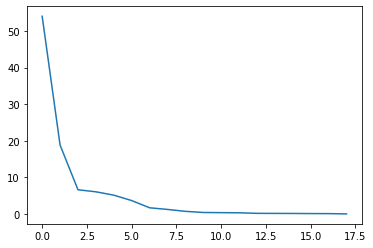

In [67]:
plt.plot(variance_explained)

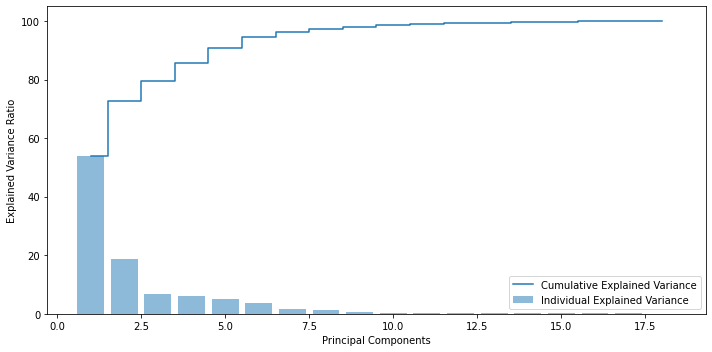

In [68]:
# visualizing the plot: principal component vs explained variance ratio:
plt.figure(figsize=(10,5))
plt.bar(range(1, eigen_values.size + 1), variance_explained, alpha = 0.5, align = 'center', label = 'Individual Explained Variance')
plt.step(range(1, eigen_values.size + 1), cum_var_explained, where = 'mid', label = "Cumulative Explained Variance")
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Thus, from the above plot it is clear that the first eight principal components are able to explain 95% variance of data. Going forward we will use these eight principal components in our model.

In [69]:
# Dimensionality Reduction. Here, we will be using the mathematical rationale behind PCA:
p_reduce = np.array(eigen_vectors_sorted[0:8])

scaled_X_train_pca = np.dot(scaled_X_train, p_reduce.T)
scaled_X_test_pca = np.dot(scaled_X_test, p_reduce.T)

print("After applying PCA X_train is: \n", scaled_X_train_pca)
print("\n After applying PCA X_test is: \n", scaled_X_test_pca)

After applying PCA X_train is: 
 [[ 2.1108542   1.49025111 -2.17533338 ... -0.70805675  0.25275601
  -0.05181432]
 [ 2.99882775 -0.56591408  0.0615386  ... -0.41499588 -0.91307921
  -0.76662944]
 [-5.15742295 -2.40520944  0.23610676 ... -0.19009376 -0.82858901
  -0.26845315]
 ...
 [ 0.14191049  1.50993707 -1.68535489 ... -0.00558569 -0.52572461
  -0.62283857]
 [-0.43429962 -1.5967328  -0.26462248 ... -0.48519306  0.57189182
   0.41951731]
 [ 0.51402345 -0.78189918 -0.65486    ... -0.06025627  0.86873414
  -0.53693554]]

 After applying PCA X_test is: 
 [[-0.73402144 -1.53042009 -0.83858703 ... -0.34781646  0.23653553
   0.52959372]
 [ 4.21574651 -2.85475409 -1.95709913 ...  1.79040352  0.66636368
   0.76205518]
 [ 0.43305911  1.62333762 -0.6428048  ... -0.07531365 -0.2593419
   0.76608793]
 ...
 [-4.32916113 -1.14944104  0.4910205  ...  0.64980971 -0.18460125
  -0.16397641]
 [-1.4285857   3.01767049 -1.09639785 ... -0.26855294 -0.58429233
   0.76454162]
 [-1.84216811  3.65202368 -1.036

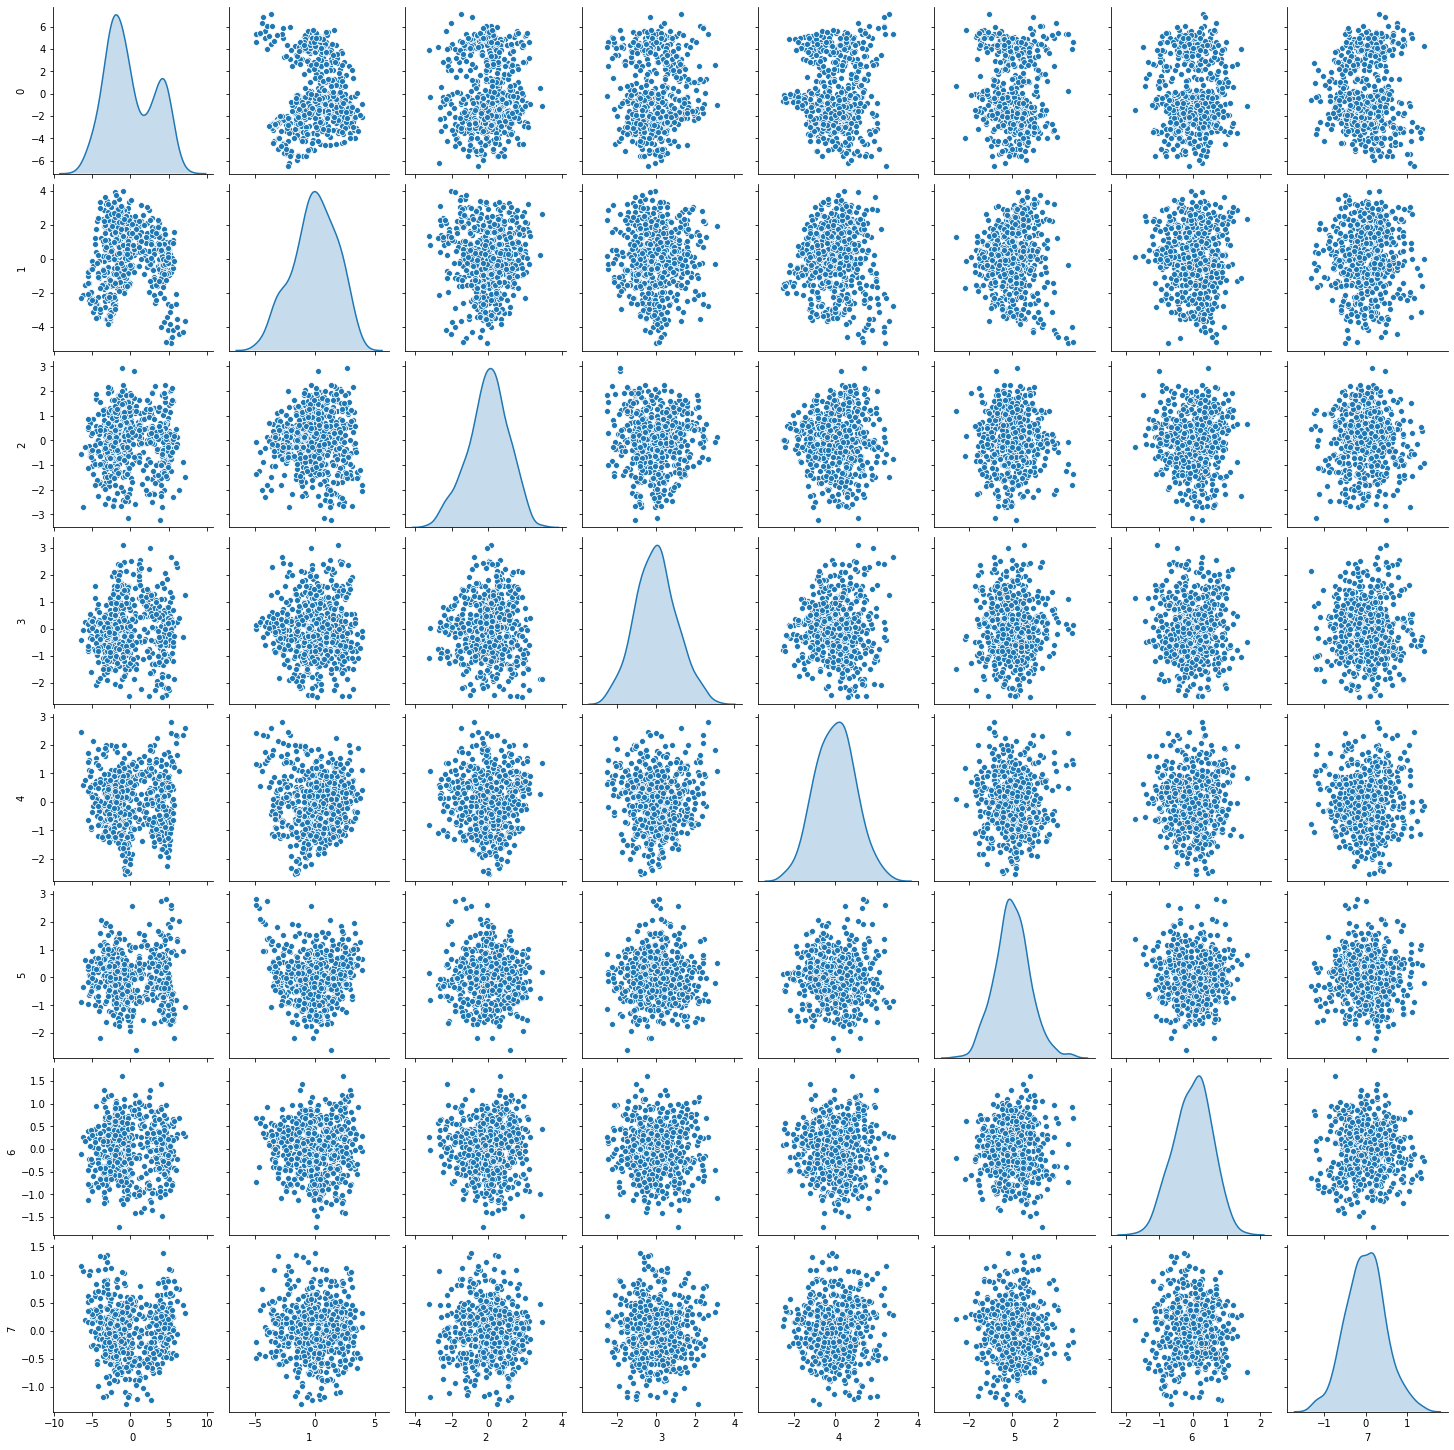

In [70]:
# pairplot analysis of X_train after applying PCA:
sns.pairplot(pd.DataFrame(scaled_X_train_pca), diag_kind = 'kde')

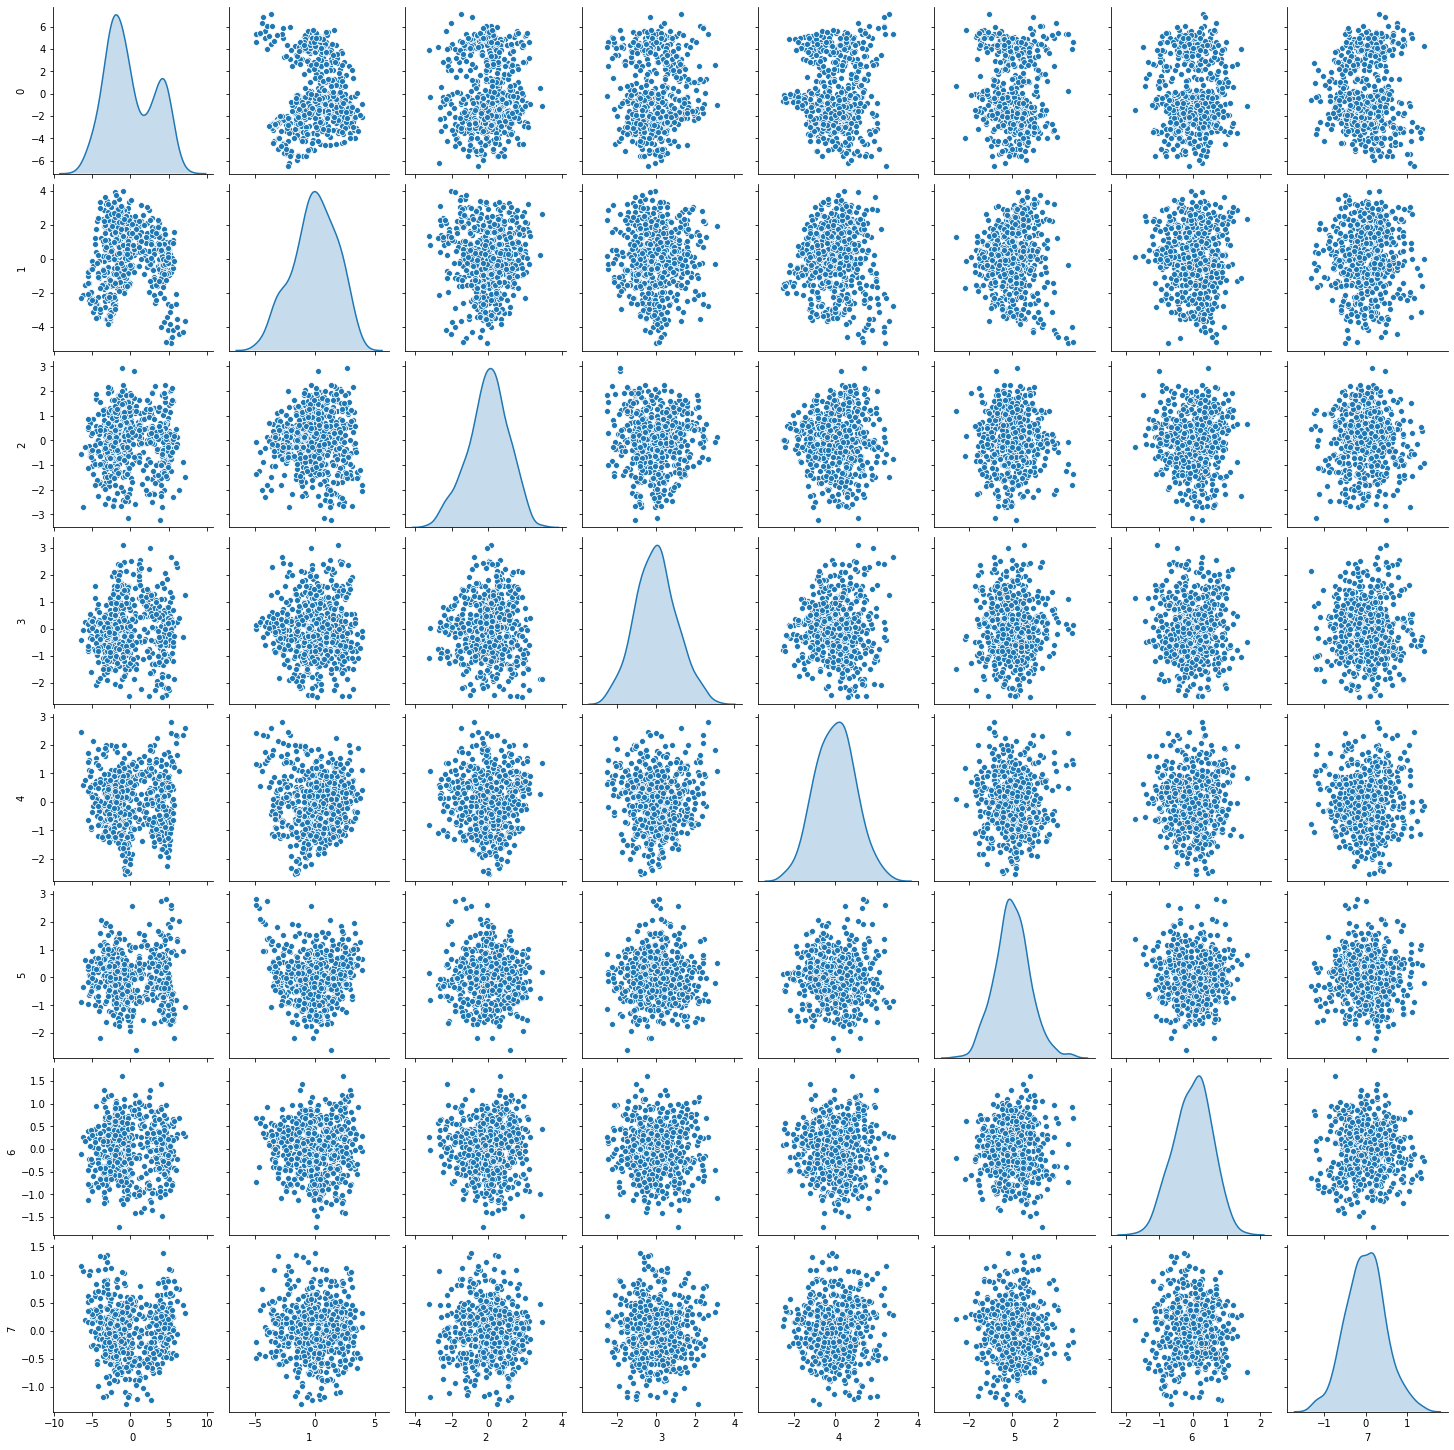

In [71]:
# pairplot analysis of X_test after applying PCA:
sns.pairplot(pd.DataFrame(scaled_X_train_pca), diag_kind = 'kde')

From, the above pairplot it is clear that after using PCA all our attributes have become independent of each other with no correlation among them as all of them have cloud of data points.

### 7. SVM after applying PCA

In [72]:
svm_model_pca = SVC(probability = True)
svm_model_pca.fit(scaled_X_train_pca, y_train)

SVC(probability=True)

In [73]:
pred_svm_pca = svm_model_pca.predict(scaled_X_test_pca)
predictprob_svm_pca = svm_model_pca.predict_proba(scaled_X_test_pca)

In [74]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_svm_pca))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_svm_pca))

Classification report for the model is given as: 
               precision    recall  f1-score   support

         bus       0.92      0.98      0.95        59
         car       0.95      0.95      0.95       133
         van       0.91      0.85      0.88        62

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254

Accuracy obtained from the given model is: 0.9330708661417323


Thus, the model have an accuracy of 93.3%.

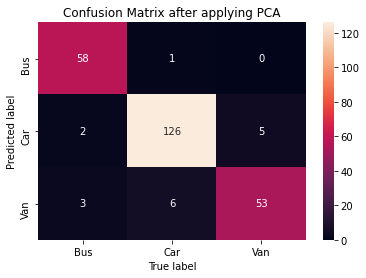

In [75]:
# Confusion Matrix:
cm_svm_pca = confusion_matrix(y_test, pred_svm_pca)

class_label = ['Bus', 'Car', 'Van']
df_cm_svm = pd.DataFrame(cm_svm_pca, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_svm, annot = True, fmt = 'd')
plt.title('Confusion Matrix after applying PCA')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

From the above Classification Matrix it is clear:
- The model has clearly predicted 58 vehicles as Bus which were actually Bus. However, it had also predicted 1 vehicle as Bus which was actually Car
- The model has clearly predicted 126 vehicles as Car which were actually Car. However, it had also predicted 2 vehicles as Car which were actually Bus. Also, it had predicted 5 vehicles as Car which were actually Van
- The model has clearly predicted 53 vehicles as Van which were actually Van. However, it had also predicted 3 vehicles as Van which were actually Bus. Also, it had predicted 6 vehicles as Van which were actually Car.

#### Using GridSearchCV 

The best classifier is:  SVC(C=10.0, class_weight='balanced', gamma=0.1)


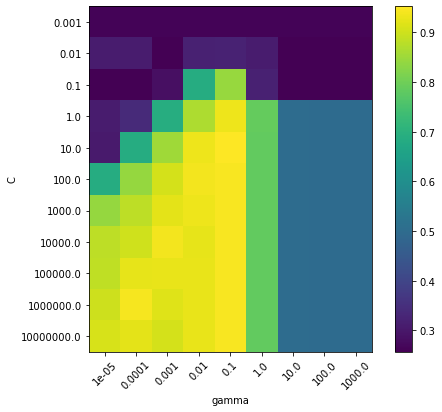

In [76]:
C_range = 10. ** np.arange(-3,8)
gamma_range = 10. **np.arange(-5,4)

param_grid = dict(gamma = gamma_range, C = C_range)

grid = GridSearchCV(SVC(class_weight = 'balanced'), param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

grid.fit(scaled_X_train_pca, y_train)
print("The best classifier is: ", grid.best_estimator_)

score_dict = grid.cv_results_

scores = score_dict.get('mean_test_score')
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.show()

In [77]:
svm_model_pca_cv = SVC(C = 10.0, gamma = 0.1, random_state = 1, probability = True)
svm_model_pca_cv.fit(scaled_X_train_pca, y_train)

SVC(C=10.0, gamma=0.1, probability=True, random_state=1)

In [78]:
pred_svm_pca_cv = svm_model_pca_cv.predict(scaled_X_test_pca)
predictprob_svm_pca_cv = svm_model_pca_cv.predict_proba(scaled_X_test_pca)

In [79]:
# print classification report and accuracy score:
print('Classification report for the model is given as:', '\n', classification_report(y_test, pred_svm_pca_cv))
print('Accuracy obtained from the given model is:', accuracy_score(y_test, pred_svm_pca_cv))

Classification report for the model is given as: 
               precision    recall  f1-score   support

         bus       0.93      0.95      0.94        59
         car       0.95      0.95      0.95       133
         van       0.92      0.90      0.91        62

    accuracy                           0.94       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254

Accuracy obtained from the given model is: 0.937007874015748


Thus, the accuracy obtained from the above model is 93.7%.

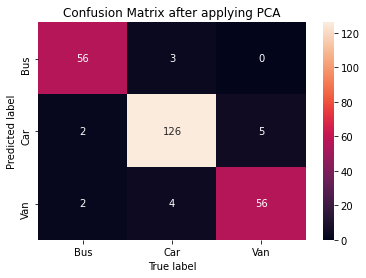

In [80]:
# Confusion Matrix:
cm_svm_pca_cv = confusion_matrix(y_test, pred_svm_pca_cv)

class_label = ['Bus', 'Car', 'Van']
df_cm_svm_pca_cv = pd.DataFrame(cm_svm_pca_cv, index = class_label, columns = class_label)
ax = sns.heatmap(df_cm_svm_pca_cv, annot = True, fmt = 'd')
plt.title('Confusion Matrix after applying PCA')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

From the above Classification Matrix it is clear:
- The model has clearly predicted 56 vehicles as Bus which were actually Bus. However, it had also predicted 3 vehicles as Bus which were actually Car
- The model has clearly predicted 126 vehicles as Car which were actually Car. However, it had also predicted 2 vehicles as Car which were actually Bus. Also, it had predicted 5 vehicles as Car which were actually Van
- The model has clearly predicted 56 vehicles as Van which were actually Van. However, it had also predicted 2 vehicles as Van which were actually Bus. Also, it had predicted 3 vehicles as Van which were actually Car.

### 8. Comparison of scores.

So, here we have tried four models - SVM, SVM with GridSearchCV, SVM with PCA and SVM with PCA and GridSearchCV. All the four models had predicted 59 vehicles as Cars, 133 vehicles as Bus and 62 vehicles as Van with varying amount of accuracy.

**Support Vector Machine (SVM):**

This model provided an accuracy of 95.67%. Along with this the model has a precision of 0.97 for Car, 0.96 for Bus and 0.95 for Van and a weighted accuracy of 0.96. It also has a recall of 0.97 for Car, 0.97 for Bus and 0.92 for Van. Out of actual 59 cars, 133 buses and 62 vans it had correctly predicted 57 cars, 129 buses and 57 vans.

**Support Vector Machine (SVM) with GridSearchCV:**

This model provided an accuracy of 95.28%. Along with this the model has a precision of 0.95 for Car, 0.97 for Bus and 0.92 for Van and a weighted accuracy of 0.95. It also has a recall of 0.98 for Car, 0.95 for Bus and 0.92 for Van. Out of actual 59 cars, 133 buses and 62 vans it had correctly predicted 58 cars, 127 buses and 57 vans.

**Support Vector Machine (SVM) with Principal Component Analysis (PCA):**

This model provided an accuracy of 93.3%. Along with this the model has a precision of 0.92 for Car, 0.95 for Bus and 0.91 for Van and a weighted accuracy of 0.93. It also has a recall of 0.98 for Car, 0.95 for Bus and 0.85 for Van. Out of actual 59 cars, 133 buses and 62 vans it had correctly predicted 58 cars, 126 buses and 53 vans.

**Support Vector Machine (SVM) with Principal Component Analysis (PCA) and GridSearchCV:**

This model provided an accuracy of 93.7%. Along with this the model has a precision of 0.93 for Car, 0.95 for Bus and 0.92 for Van and a weighted accuracy of 0.94. It also has a recall of 0.95 for Car, 0.95 for Bus and 0.9 for Van. Out of actual 59 cars, 133 buses and 62 vans it had correctly predicted 56 cars, 126 buses and 56 vans.

Thus, from this exercise we can come to the following conclusions:
- At first instance we can see that Support Vector Machine (SVM) has the best accuracy among all the four models that has been used here. But what it should be considered here is the fact that to achieve such a high accuracy it has used all the 18 independent attributes to predict whether a given vehicle is a Car, Bus or Van.
- The model where we have used Support Vector Machine with Principal Component Analysis and GridSearchCV has a slight lower accuracy then the SVM one but what one should notice is the fact that we have achieved the said weighted accuracy of 0.94 with just 8 principal components (the most 8 relevant ones). Also, other scores like precision and recall and the predictions made by this model are slightly lower than the one not using PCA.

**Thus, if one wants to select a model then going for an algorithm coupled with PCA might be the best one, as it will help to predict with an accuracy slightly lower than the one not using PCA with most relevant components (the threshold being defined by the user).**  